In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

#
  # 1/Mpc
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                   'output':'tCl,pCl,lCl,mPk,mTk',
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values': 0.00001,
                   # LambdaCDM parameters
                   'Omega_Lambda':0, 
                   'Omega_fld':0,
                   'Omega_smg' : -1,
                   'gravity_model' :'propto_omega',
                   'parameters_smg' :'0.0001, 0.0001, 0.0001, 0.0001, 1.',
                   'expansion_model' :'lcdm',
                   'expansion_smg' : 0.5,
                   'output_background_smg' :10,
                   'skip_stability_tests_smg' : 'no',
                   'cs2_safe_smg' : 0.,
                   'D_safe_smg' : 0.,
                   'ct2_safe_smg' :0.,
                   'M2_safe_smg' : 0.,
                   'a_min_stability_test_smg' : 0.0001,
    
    
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'hubble_evolution' : 'y',
                   'hubble_friction' :3.,
                   'pert_initial_conditions_smg' : 'ext_field_attr',
                   
                   # other options and settings
                   'pert_ic_ini_z_ref_smg' : 1e10,    
                   'pert_ic_tolerance_smg' : 2e-2, 
                   'pert_ic_regulator_smg' : 1e-15,
                   'pert_qs_ic_tolerance_test_smg' : 10,
                   'method_qs_smg' : 'fully_dynamic',
                   'z_fd_qs_smg' : 10.,
                   'trigger_mass_qs_smg' : 1.e3,
                   'trigger_rad_qs_smg' : 1.e3, 
                   'eps_s_qs_smg' : 0.01,
                   'n_min_qs_smg' : 1e2,
                   'n_max_qs_smg' : 1e4,
                   'start_small_k_at_tau_c_over_tau_h' : 1e-4,
                   'start_large_k_at_tau_h_over_tau_k' : 1e-4,
                   'perturb_sampling_stepsize' : 0.05,
                   'l_logstep' : 1.045,
                   'l_linstep' : 50,
                   'gauge':'synchronous'}  

In [3]:
# call CLASS
#
M = Class()
M.set(common_settings)
M.compute()

In [4]:
transfer = M.get_transfer()  # this potentially constains scalars/tensors and all k values

In [7]:
transfer

{'k (h/Mpc)': array([1.04500435e-05, 1.48025342e-05, 2.33303164e-05, 3.62558823e-05,
        4.92615148e-05, 6.23825628e-05, 7.56552653e-05, 8.91170768e-05,
        1.02807007e-04, 1.16765980e-04, 1.31037213e-04, 1.45666629e-04,
        1.60703296e-04, 1.76199904e-04, 1.92213282e-04, 2.08804959e-04,
        2.26041766e-04, 2.43996490e-04, 2.62748565e-04, 2.82384803e-04,
        3.03000155e-04, 3.24698477e-04, 3.47593282e-04, 3.71808438e-04,
        3.97478757e-04, 4.24750410e-04, 4.53781079e-04, 4.84739731e-04,
        5.17805897e-04, 5.53168301e-04, 5.91022712e-04, 6.31568885e-04,
        6.75006514e-04, 7.21530196e-04, 7.71323518e-04, 8.24552517e-04,
        8.81358923e-04, 9.41853718e-04, 1.00611163e-03, 1.07416713e-03,
        1.14601251e-03, 1.22159813e-03, 1.30083497e-03, 1.38359917e-03,
        1.46973793e-03, 1.55907632e-03, 1.65142423e-03, 1.74658296e-03,
        1.84435118e-03, 1.94452970e-03, 2.04692542e-03, 2.15135403e-03,
        2.25764193e-03, 2.36562731e-03, 2.47516062e

In [5]:
transfer['Geff_smg']

array([1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002997,
       1.00002997, 1.00002997, 1.00002997, 1.00002997, 1.00002

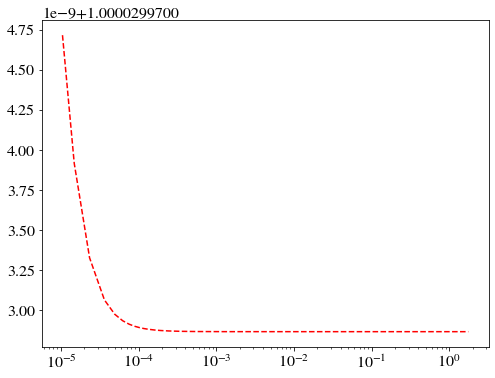

In [10]:
plt.plot(transfer['k (h/Mpc)'], transfer['Geff_smg'], 'r--')
plt.xscale('log')
plt.show()